# SPAM EMAIL DETECTION WITH MACHINE LEARNING

**In this project, we will use Python to create an email spam detection system. Our goal is to train a machine learning model that can classify emails as either spam or non-spam (ham). This will help us filter out unwanted and potentially harmful emails from our inbox. We'll follow the standard data science workflow, including data loading, preprocessing, feature extraction, model training, evaluation, and prediction. Let's begin building our email spam detector!** 

## **Understanding the Data**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter


#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Downloading the stopwords dataset
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [9]:
df[df.duplicated()]


,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
#Drop duplicated values
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
df.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [13]:
df.shape

(5169, 2)

In [14]:
df['Category'].value_counts()


Category
ham     4516
spam     653
Name: count, dtype: int64

## **Data Visualisation** 

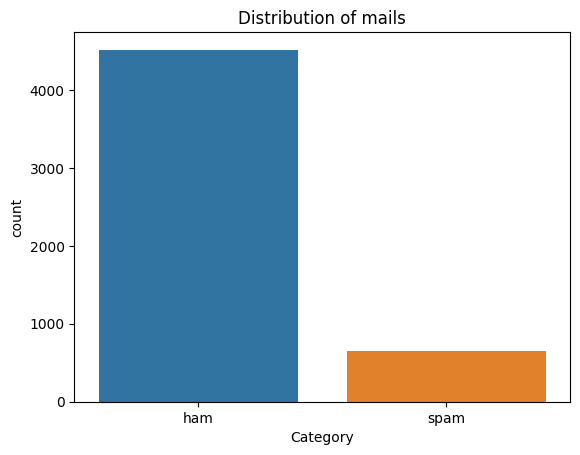

In [15]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

## **Data Preprocessing**

In [16]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8908\729011151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["Category"] == "spam", "Category"] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_8908\729011151.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["Category"] == "ham", "Category"] = 1


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Separate the feature (X) and target (Y) data

X = df["Message"]
Y = df["Category"]

In [20]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [21]:
Y


0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5169, dtype: object

In [22]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


## **Feature Extraction: TF-IDF**

In [24]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [25]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [26]:
# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [27]:
print(X_train)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Message, Length: 4135, dtype: object


In [28]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31577 stored elements and shape (4135, 7395)>
  Coords	Values
  (0, 2588)	0.6664392762829205
  (0, 3545)	0.7455593142248959
  (2, 6999)	0.6378379419700079
  (2, 4002)	0.6378379419700079
  (2, 4696)	0.29654379102529516
  (2, 6589)	0.3136674984299076
  (3, 2862)	0.13885072459149478
  (3, 6938)	0.19708708091575408
  (3, 1553)	0.20428654549041733
  (3, 4954)	0.23384958966251285
  (3, 3168)	0.19120469004402674
  (3, 5171)	0.20953002785296104
  (3, 3941)	0.18912243046764834
  (3, 5450)	0.2300494583671639
  (3, 271)	0.23384958966251285
  (3, 4419)	0.2562131692599451
  (3, 516)	0.19460402332334106
  (3, 1997)	0.26549489341098675
  (3, 4630)	0.26549489341098675
  (3, 4299)	0.18532229917229942
  (3, 251)	0.19582167067522926
  (3, 6770)	0.2300494583671639
  (3, 4344)	0.22076773421612225
  (3, 52)	0.26549489341098675
  (3, 1534)	0.23384958966251285
  :	:
  (4132, 4965)	0.4611318152567797
  (4132, 2504)	0.7352222278037867
  (4133, 6589)	

## **Model Training** 

In [29]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

## **Model Evaluation and Prediction** 

In [30]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [31]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9610640870616687


In [32]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [33]:
print("Accuracy on test data:",accuracy_on_test_data)


Accuracy on test data: 0.9642166344294004


In [34]:
# Test the model with some custom email messages

input_mail = ["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [37]:
input_mail = ["This is a friendly reminder about our meeting scheduled for tomorrow at 10:00 AM in the conference room. Please make sure to prepare your presentation and bring any necessary materials."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


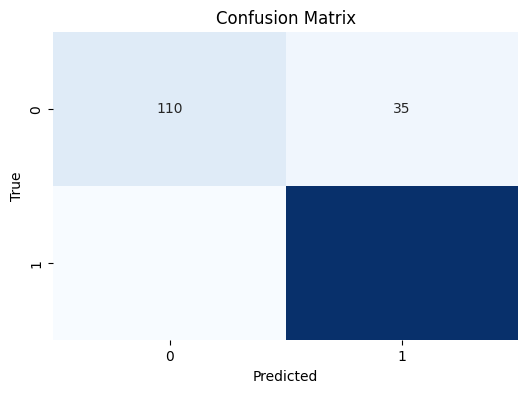

In [38]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

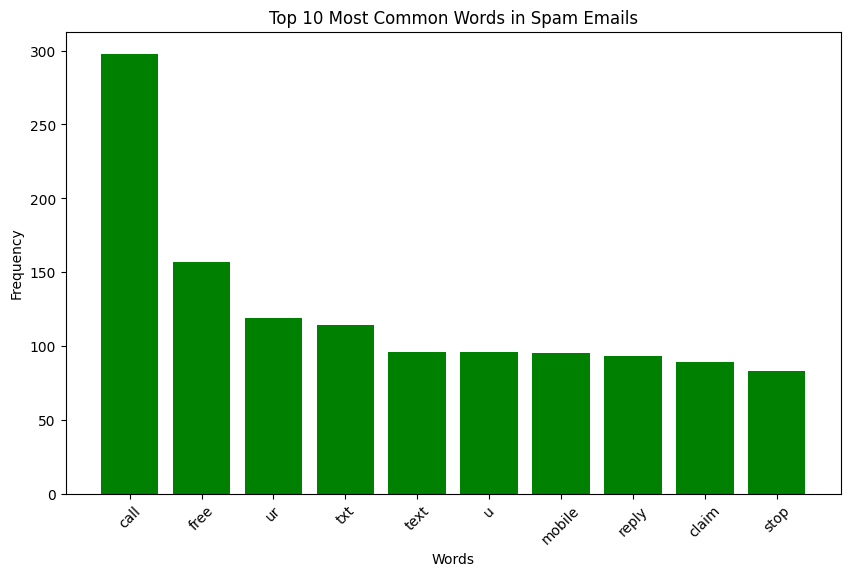

In [40]:
# Data visualization - Top 10 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

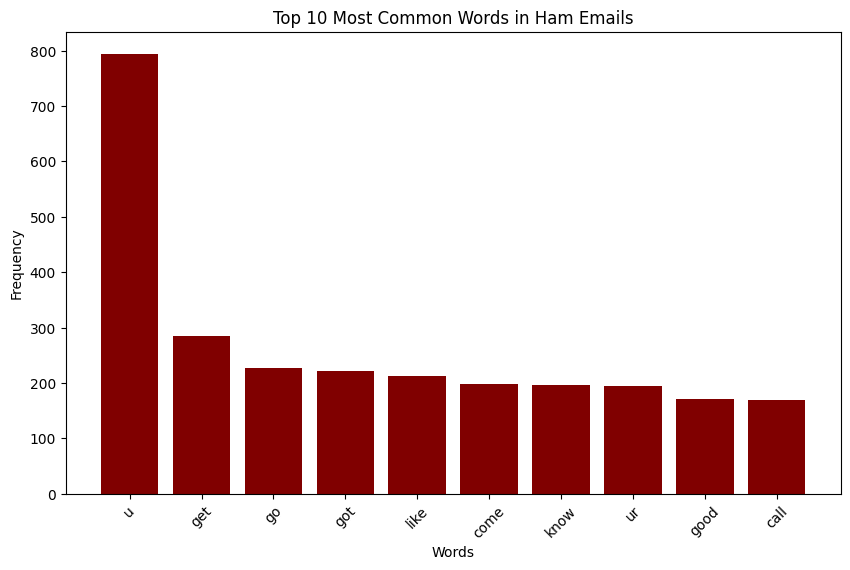

In [42]:
# Data visualization - Top 10 Most Common Words in Ham Emails

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='maroon')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()